Planted motifs (prime intervals, dynamic range): 3574
Motif indexes (prime intervals, dynamic range): [0, 10, 22, 38, 56, 78, 102, 130, 164, 200, 242, 288, 336, 346, 358, 374, 392, 414, 438, 466, 500, 536, 578, 624, 672, 682, 694, 710, 728, 750, 774, 802, 836, 872, 914, 960, 1008, 1018, 1030, 1046, 1064, 1086, 1110, 1138, 1172, 1208, 1250, 1296, 1344, 1354, 1366, 1382, 1400, 1422, 1446, 1474, 1508, 1544, 1586, 1632, 1680, 1690, 1702, 1718, 1736, 1758, 1782, 1810, 1844, 1880, 1922, 1968, 2016, 2026, 2038, 2054, 2072, 2094, 2118, 2146, 2180, 2216, 2258, 2304, 2352, 2362, 2374, 2390, 2408, 2430, 2454, 2482, 2516, 2552, 2594, 2640, 2688, 2698, 2710, 2726, 2744, 2766, 2790, 2818, 2852, 2888, 2930, 2976, 3024, 3034, 3046, 3062, 3080, 3102, 3126, 3154, 3188, 3224, 3266, 3312, 3360, 3370, 3382, 3398, 3416, 3438, 3462, 3490, 3524, 3560, 3602, 3648, 3696, 3706, 3718, 3734, 3752, 3774, 3798, 3826, 3860, 3896, 3938, 3984, 4032, 4042, 4054, 4070, 4088, 4110, 4134, 4162, 4196, 4232, 4274, 4320, 4368

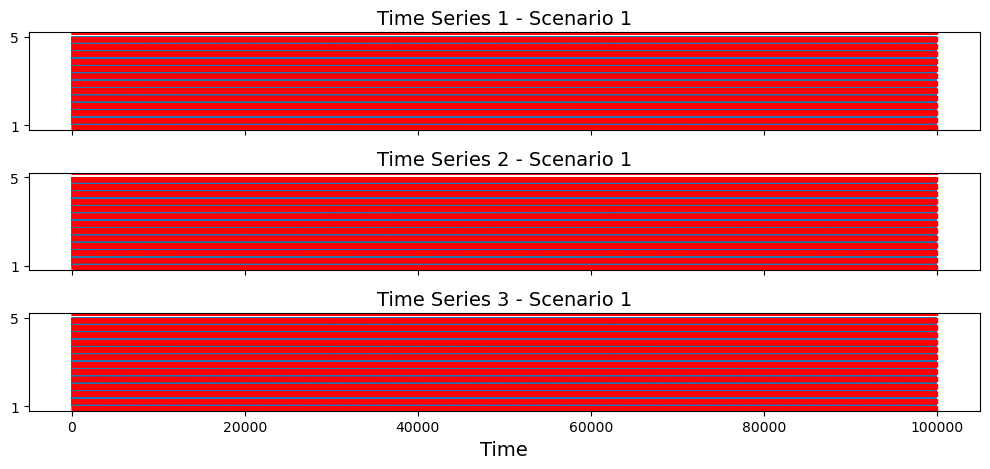

Plot saved for scenario 1.
Planted motifs (random interval): 2654
Motif indexes (random interval): [45, 77, 113, 146, 179, 228, 255, 298, 335, 370, 417, 451, 482, 529, 557, 584, 631, 676, 726, 763, 796, 832, 882, 910, 952, 994, 1038, 1079, 1114, 1156, 1198, 1229, 1263, 1311, 1359, 1395, 1434, 1466, 1503, 1552, 1599, 1635, 1662, 1696, 1732, 1757, 1791, 1825, 1861, 1899, 1936, 1985, 2016, 2051, 2080, 2118, 2167, 2214, 2249, 2290, 2333, 2365, 2395, 2437, 2474, 2520, 2550, 2583, 2626, 2662, 2706, 2746, 2789, 2820, 2859, 2901, 2944, 2989, 3038, 3088, 3138, 3171, 3210, 3240, 3275, 3316, 3366, 3404, 3440, 3480, 3529, 3568, 3593, 3628, 3669, 3712, 3759, 3797, 3841, 3888, 3935, 3975, 4009, 4039, 4070, 4101, 4146, 4181, 4208, 4252, 4289, 4319, 4369, 4394, 4434, 4461, 4509, 4539, 4583, 4619, 4653, 4681, 4713, 4747, 4772, 4815, 4846, 4893, 4935, 4972, 5011, 5061, 5095, 5129, 5166, 5208, 5239, 5278, 5308, 5348, 5388, 5429, 5477, 5515, 5543, 5591, 5618, 5649, 5680, 5730, 5779, 5821, 5867, 5916, 5962

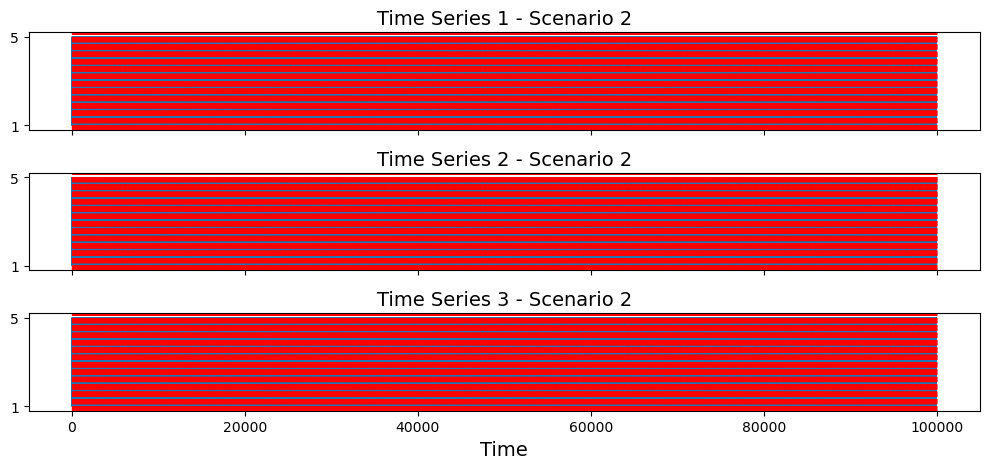

Plot saved for scenario 2.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

np.random.seed(0)

class TimeSeriesMotifGenerator:
    def __init__(self, n=1000, k=3, motif_pattern=[[1, 1, 1, 1, 1]], variables_pattern=None, output_path="../data/syntheticdata/", image_path="../images/"):
        """
        Initialize the generator with the time series length, number of series, motif pattern, and output paths.
        """
        self.n = n
        self.k = k
        self.motif_pattern = motif_pattern
        self.p = len(motif_pattern[0])
        self.variables_pattern = variables_pattern if variables_pattern else list(range(k))
        self.output_path = output_path
        self.image_path = image_path

        os.makedirs(self.image_path, exist_ok=True)
        self.data = np.random.randint(1, 6, (k, n))
        self.motif_indexes_scenario1 = []
        self.motif_indexes_scenario2 = []

    @staticmethod
    def generate_primes_in_range(min_val, max_val):
        """
        Generate prime numbers within a given range.
        """
        primes = []
        for num in range(min_val, max_val + 1):
            if num > 1 and all(num % i != 0 for i in range(2, int(num ** 0.5) + 1)):
                primes.append(num)
        return primes

    def plant_motifs_prime_intervals(self, min_step=5, max_step=50):
        """
        Insert motifs at intervals based on prime numbers within a specified range.
        """
        prime_steps = self.generate_primes_in_range(min_step, max_step)

        index, i = 0, 0
        while index < self.n:
            if index + self.p <= self.n:
                self.motif_indexes_scenario1.append(index)
                for idx_pattern, col in enumerate(self.variables_pattern):
                    self.data[col, index:index + self.p] = self.motif_pattern[idx_pattern]

            step = prime_steps[i % len(prime_steps)]
            index += step + self.p
            i += 1

        print(f"Planted motifs (prime intervals, dynamic range): {len(self.motif_indexes_scenario1)}")
        print("Motif indexes (prime intervals, dynamic range):", self.motif_indexes_scenario1)

    def plant_motifs_random_interval_precursorsignal(self, min_step=5, max_step=50, precursor_signal=[5, 5, 5], min_lag_precursor=3, max_lag_precursor=5):
        """
        Insert the motif pattern at random intervals with a precursor signal before each motif.
        """
        if min_step < len(precursor_signal) + max_lag_precursor:
            raise ValueError(
                "min_step is too small to accommodate the precursor signal with the given lag range. "
                "Ensure that min_step >= len(precursor_signal) + max_lag_precursor."
            )

        last_index = -self.p

        while True:
            index_interval = np.random.randint(min_step, max_step + 1)
            motif_start = last_index + self.p + index_interval

            if motif_start + self.p > self.n:
                break

            precursor_start = motif_start - np.random.randint(min_lag_precursor, max_lag_precursor + 1)
            precursor_end = precursor_start + len(precursor_signal)

            if 0 <= precursor_start < self.n and precursor_end <= self.n:
                for col in self.variables_pattern:
                    self.data[col, precursor_start:precursor_end] = precursor_signal

            motif_end = motif_start + self.p
            if motif_end > self.n:
                break
            for idx_pattern, col in enumerate(self.variables_pattern):
                self.data[col, motif_start:motif_end] = self.motif_pattern[idx_pattern]

            self.motif_indexes_scenario2.append(motif_start)
            last_index = motif_start

        print(f"Planted motifs (random interval): {len(self.motif_indexes_scenario2)}")
        print("Motif indexes (random interval):", self.motif_indexes_scenario2)

    def save_data(self, scenario=1, min_step=None, max_step=None):
        """
        Save the generated data and motif indexes to CSV files.
        """
        os.makedirs(self.output_path, exist_ok=True)

        if scenario == 1:
            filename_suffix = f"min_step={min_step}_max_step={max_step}"
            motif_indexes = self.motif_indexes_scenario1
        elif scenario == 2:
            filename_suffix = f"max_interval={max_step}" if max_step else f"max_interval={self.n // 50}"
            motif_indexes = self.motif_indexes_scenario2

        data_filename = f"{self.output_path}scenario{scenario}_n={self.n}_k={self.k}_p={self.p}_{filename_suffix}_variables={self.variables_pattern}.csv"
        indexes_filename = f"{self.output_path}motif_indexes_scenario{scenario}_n={self.n}_k={self.k}_p={self.p}_{filename_suffix}.csv"

        np.savetxt(data_filename, self.data, delimiter=",", fmt='%.3f')
        np.savetxt(indexes_filename, motif_indexes, delimiter=",", fmt='%d')

        print(f"Data and motif indexes saved for scenario {scenario}.")
        print(f"Data file: {data_filename}")
        print(f"Motif indexes file: {indexes_filename}")

    def plot_data(self, scenario=1):
        """
        Plot the time series data with highlighted motifs.
        """
        fig, axes = plt.subplots(nrows=self.k, ncols=1, figsize=(10, 5), sharex=True)
        motif_indexes = self.motif_indexes_scenario1 if scenario == 1 else self.motif_indexes_scenario2

        for i, ax in enumerate(axes):
            ax.plot(self.data[i], linewidth=0.5)
            ax.set_yticks([1, 5])
            ax.set_title(f"Time Series {i + 1} - Scenario {scenario}", fontsize=14)
            for idx in motif_indexes:
                ax.axvline(x=idx, color='r', linestyle='--', linewidth=1)

        plt.xlabel("Time", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(f"{self.image_path}data_synthetic_scenario{scenario}_n={self.n}_k={self.k}_p={self.p}.png")
        plt.show()
        print(f"Plot saved for scenario {scenario}.")

    def generate_and_save(self, scenario=1, min_step=None, max_step=None):
        """
        Generate data, plant motifs, save data, and plot the time series.
        """
        if scenario == 1:
            self.plant_motifs_prime_intervals(min_step=min_step, max_step=max_step)
        elif scenario == 2:
            self.plant_motifs_random_interval_precursorsignal(
                min_step=min_step, max_step=max_step, precursor_signal=[5, 5, 5], min_lag_precursor=10, max_lag_precursor=15
            )
        self.save_data(scenario=scenario, min_step=min_step, max_step=max_step)
        self.plot_data(scenario=scenario)

# Example usage
np.random.seed(0)
generator = TimeSeriesMotifGenerator(
    n=100000, k=3, motif_pattern=[[1, 1, 1, 1, 1], [3, 3, 3, 3, 3]], variables_pattern=[0, 2], output_path="../data/syntheticdata/variables=[0,2]/", image_path="../images/"
)
generator.generate_and_save(scenario=1, min_step=5, max_step=45)
generator = TimeSeriesMotifGenerator(
    n=100000, k=3, motif_pattern=[[1, 1, 1, 1, 1], [3, 3, 3, 3, 3]], variables_pattern=[0, 2], output_path="../data/syntheticdata/variables=[0,2]/", image_path="../images/"
)
generator.generate_and_save(scenario=2, min_step=20, max_step=45)
